In [2]:
import sys
import os
parent_dir = os.path.abspath(os.path.join('..'))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
%load_ext autoreload
%autoreload 2

import librosa
import matplotlib.pyplot as plt
import numpy as np
from scripts.scale_transform_magnitude import compute_stm

import IPython.display as ipd
from numpy.linalg import norm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Scale transform magnitude's stability to tempo variation

Assess the extent to which the feature remains invariant despite tempo transformations applied to the signal.



In [4]:
# path to audio file
audio_file = "../audio_files/clip-MJ_Maraka_1_J1.wav"

stretch_factor = 1.5
y, sr = librosa.load(audio_file, sr=None)
y_stretched_up = librosa.effects.time_stretch(y, rate=stretch_factor)
y_stretched_down = librosa.effects.time_stretch(y, rate=round(1 / stretch_factor, 1))

ipd.display(ipd.Audio(y, rate=sr))
ipd.display(ipd.Audio(y_stretched_up, rate=sr))
ipd.display(ipd.Audio(y_stretched_down, rate=sr))

We expect a high similarity score as the STM is supposed to capture rythmic aspects regardless of the tempo variations.


/home/stefano/internship/rythmic-pattern-analysis/scripts/scale_transform_magnitude.py:29: UserWarning: auto_cor_window_seconds is bigger than duration of audio file, setting it to duration
  warnings.warn("auto_cor_window_seconds is bigger than duration of audio file, setting it to duration")


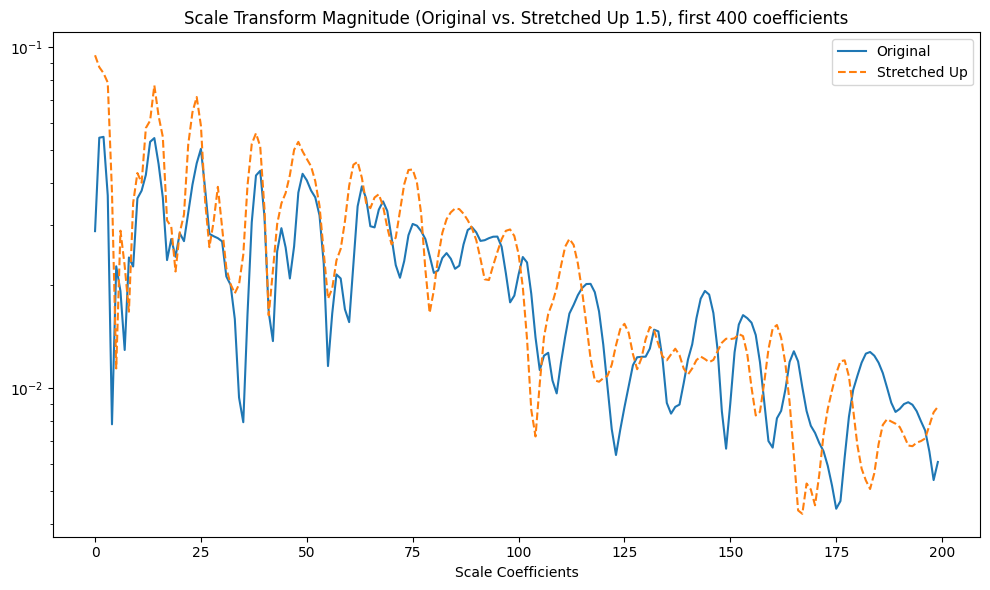

Cosine Similarity (Original vs. Stretched Up): 0.9523171346086013
Euclidean Distance (Original vs. Stretched Up): 0.14913511867661058


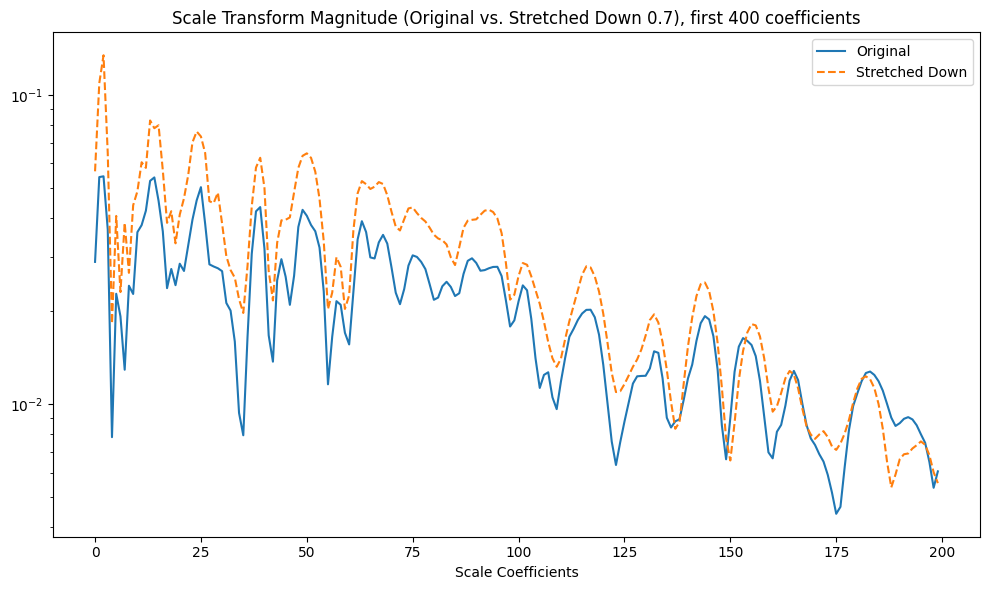

Cosine Similarity (Original vs. Stretched Down): 0.983638623729233
Euclidean Distance (Original vs. Stretched Down): 0.1907792254997788


In [8]:
# Compute the scale transform magnitude (STM) for the original and stretched versions
num_stm_coefs = 400
scale_transform_magnitude = compute_stm(y=y, sr=sr)[:num_stm_coefs]
stm_stretched_up = compute_stm(y=y_stretched_up, sr=sr)[:num_stm_coefs]

# Plotting the comparison of scale transform magnitude
fig, ax = plt.subplots(figsize=(10, 6))
ax.semilogy(np.abs(scale_transform_magnitude), label="Original")
ax.semilogy(np.abs(stm_stretched_up), label="Stretched Up", linestyle="--")
ax.set_xlabel("Scale Coefficients")
ax.set_title(
    f"Scale Transform Magnitude (Original vs. Stretched Up {stretch_factor}), first {num_stm_coefs} coefficients"
)
ax.legend()
plt.tight_layout()
plt.show()

# Compute cosine similarity and Euclidean distance
cosine_sim_stretched_up = np.dot(np.abs(scale_transform_magnitude), np.abs(stm_stretched_up)) / (
    norm(np.abs(scale_transform_magnitude)) * norm(np.abs(stm_stretched_up))
)
euclidean_dist_stretched_up = np.linalg.norm(np.abs(scale_transform_magnitude) - np.abs(stm_stretched_up))
print("Cosine Similarity (Original vs. Stretched Up):", cosine_sim_stretched_up)
print("Euclidean Distance (Original vs. Stretched Up):", euclidean_dist_stretched_up)

# Repeat the process for the stretched down version
stm_stretched_down = compute_stm(y=y_stretched_down, sr=sr)[:num_stm_coefs]

# Plotting the comparison of scale transform magnitude
fig, ax = plt.subplots(figsize=(10, 6))
ax.semilogy(np.abs(scale_transform_magnitude), label="Original")
ax.semilogy(np.abs(stm_stretched_down), label="Stretched Down", linestyle="--")
ax.set_xlabel("Scale Coefficients")
ax.set_title(
    f"Scale Transform Magnitude (Original vs. Stretched Down {round(1/stretch_factor, 1)}), first {num_stm_coefs} coefficients"
)
ax.legend()
plt.tight_layout()
plt.show()

# Compute cosine similarity and Euclidean distance
cosine_sim_stretched_down = np.dot(np.abs(scale_transform_magnitude), np.abs(stm_stretched_down)) / (
    norm(np.abs(scale_transform_magnitude)) * norm(np.abs(stm_stretched_down))
)
euclidean_dist_stretched_down = np.linalg.norm(np.abs(scale_transform_magnitude) - np.abs(stm_stretched_down))
print("Cosine Similarity (Original vs. Stretched Down):", cosine_sim_stretched_down)
print("Euclidean Distance (Original vs. Stretched Down):", euclidean_dist_stretched_down)

### Scale transform magnitude's stability to timbre variation


In [9]:
# loading file at the original sample rate before applying pitch shifting
y, sr = librosa.load(audio_file, sr=None)
steps = 12
y_pitched_up = librosa.effects.pitch_shift(y, sr=sr, n_steps=steps)
y_pitched_down = librosa.effects.pitch_shift(y, sr=sr, n_steps=-steps)

ipd.display(ipd.Audio(y, rate=sr))
ipd.display(ipd.Audio(y_pitched_up, rate=sr))
ipd.display(ipd.Audio(y_pitched_down, rate=sr))

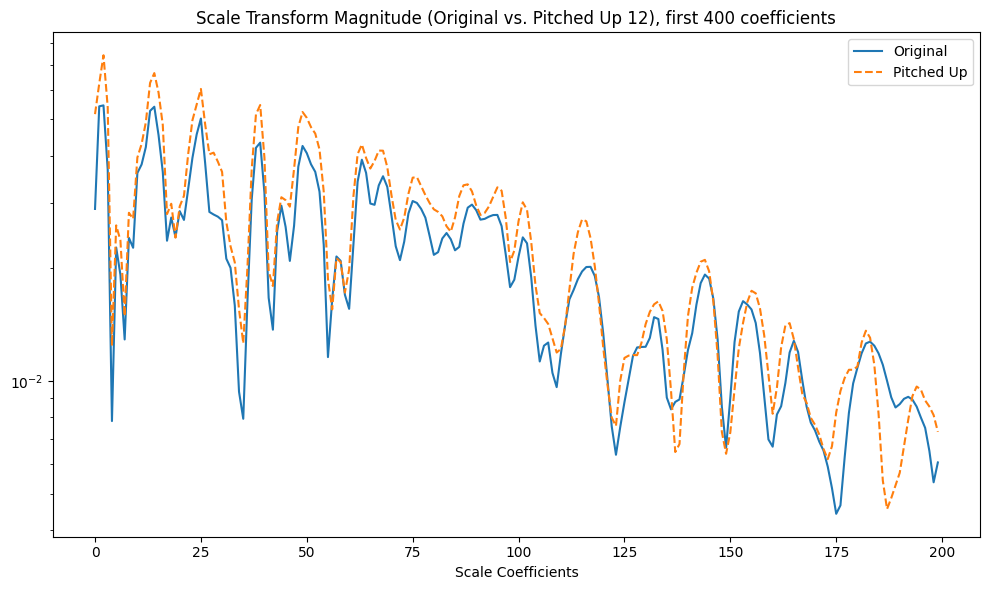

Cosine Similarity (Original vs. Pitched Up): 0.9935066571994792
Euclidean Distance (Original vs. Pitched Up): 0.07901245726869204


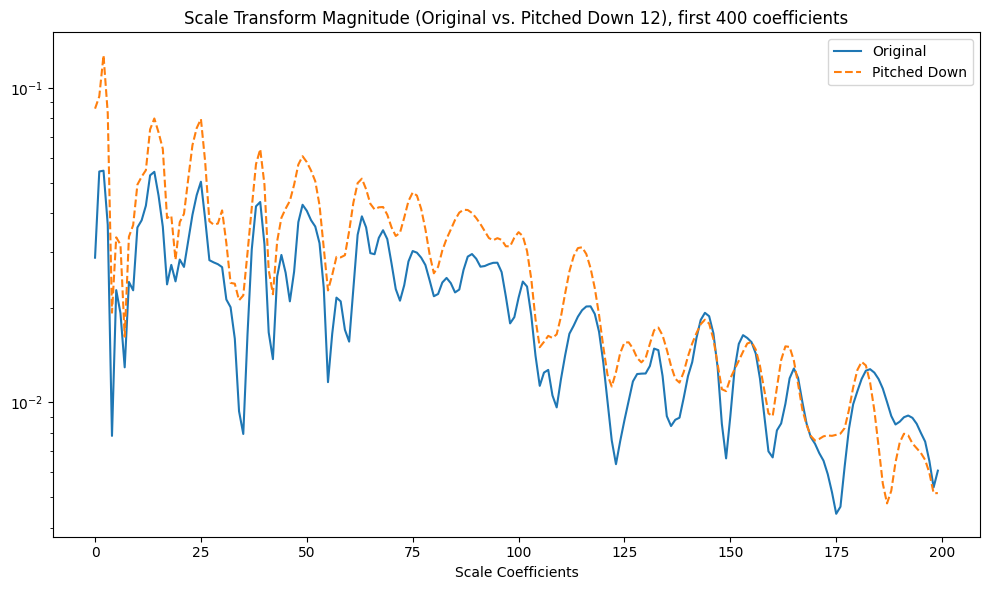

Cosine Similarity (Original vs. Pitched Down): 0.9790656367078974
Euclidean Distance (Original vs. Pitched Down): 0.18203571988550687


In [10]:
num_stm_coefs = 400
scale_transform_magnitude = compute_stm(y=y, sr=sr)[:num_stm_coefs]
stm_pitched_up = compute_stm(y=y_pitched_up, sr=sr)[:num_stm_coefs]

# Plotting the comparison of scale transform magnitude for pitched up
fig, ax = plt.subplots(figsize=(10, 6))
ax.semilogy(np.abs(scale_transform_magnitude), label="Original")
ax.semilogy(np.abs(stm_pitched_up), label="Pitched Up", linestyle="--")
ax.set_xlabel("Scale Coefficients")
ax.set_title(
    f"Scale Transform Magnitude (Original vs. Pitched Up {steps}), first {num_stm_coefs} coefficients"
)
ax.legend()
plt.tight_layout()
plt.show()

# Compute cosine similarity and Euclidean distance for pitched up
cosine_sim_pitched_up = np.dot(np.abs(scale_transform_magnitude), np.abs(stm_pitched_up)) / (
    norm(np.abs(scale_transform_magnitude)) * norm(np.abs(stm_pitched_up))
)
euclidean_dist_pitched_up = np.linalg.norm(np.abs(scale_transform_magnitude) - np.abs(stm_pitched_up))
print("Cosine Similarity (Original vs. Pitched Up):", cosine_sim_pitched_up)
print("Euclidean Distance (Original vs. Pitched Up):", euclidean_dist_pitched_up)

# Repeat the process for the pitched down version
stm_pitched_down = compute_stm(y=y_pitched_down, sr=sr)[:num_stm_coefs]

# Plotting the comparison of scale transform magnitude for pitched down
fig, ax = plt.subplots(figsize=(10, 6))
ax.semilogy(np.abs(scale_transform_magnitude), label="Original")
ax.semilogy(np.abs(stm_pitched_down), label="Pitched Down", linestyle="--")
ax.set_xlabel("Scale Coefficients")
ax.set_title(
    f"Scale Transform Magnitude (Original vs. Pitched Down {steps}), first {num_stm_coefs} coefficients"
)
ax.legend()
plt.tight_layout()
plt.show()

# Compute cosine similarity and Euclidean distance for pitched down
cosine_sim_pitched_down = np.dot(np.abs(scale_transform_magnitude), np.abs(stm_pitched_down)) / (
    norm(np.abs(scale_transform_magnitude)) * norm(np.abs(stm_pitched_down))
)
euclidean_dist_pitched_down = np.linalg.norm(np.abs(scale_transform_magnitude) - np.abs(stm_pitched_down))
print("Cosine Similarity (Original vs. Pitched Down):", cosine_sim_pitched_down)
print("Euclidean Distance (Original vs. Pitched Down):", euclidean_dist_pitched_down)